In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
madness = pd.read_csv("C:/Users/catmc/Downloads/Big_Dance_CSV.csv")

In [3]:
madness.head()

,Year,Round,Region Number,Region Name,Seed,Score,Team,Team.1,Score.1,Seed.1
0,1985,1,1,West,1,83,St Johns,Southern,59,16
1,1985,1,1,West,2,81,VCU,Marshall,65,15
2,1985,1,1,West,3,65,NC State,Nevada,56,14
3,1985,1,1,West,4,85,UNLV,San Diego St,80,13
4,1985,1,1,West,5,58,Washington,Kentucky,65,12


In [12]:
#all absolute values the seed differences
seedDiff = []
#did the smaller seed (so higher ranked team) win?
smallerWin = []

for i in range(0, len(madness.Seed)):
    seedDiffi = madness['Seed'][i] - madness['Seed.1'][i]
    seedDiff.append(abs(seedDiffi))
    if seedDiffi <= 0:
        if madness['Score'][i] > madness['Score.1'][i]:
            smallerWin.append(1)
        else: smallerWin.append(0)
    else:
        if madness['Score'][i] > madness['Score.1'][i]:
            smallerWin.append(0)
        else: smallerWin.append(1)
            
d = {'seed difference': seedDiff, 'higher rank win': smallerWin}
seedStats = pd.DataFrame(d)

In [47]:
index = []
probability = []
counts = []
for i in range(0, 16):
    count = len(seedStats['higher rank win'][seedStats['seed difference']==i])
    if count > 0:
        probability.append(sum(seedStats['higher rank win'][seedStats['seed difference']==i]) / count)
        index.append(i)
        counts.append(count)

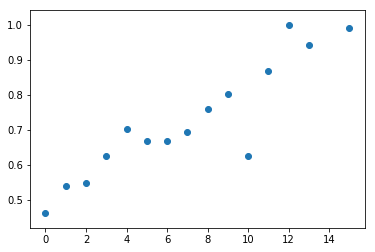

In [22]:
plt.scatter(index, probability)

In [51]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [28]:
counts

[26, 367, 51, 294, 118, 245, 18, 226, 245, 162, 8, 160, 5, 140, 140]

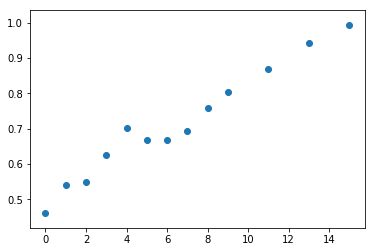

In [48]:
#remove index 10 and 12
index.remove(12)
index.remove(10)
probability.remove(1.0)
probability.remove(0.625)

plt.scatter(index, probability)

In [53]:
x = np.array(index)
y = np.array(probability)
reg = LinearRegression().fit(x.reshape(-1,1), y)

In [63]:
inputs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
predictions = reg.predict(inputs.reshape(-1,1))
print(predictions)
[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1] - predictions

[0.53091239 0.56435336 0.59779432 0.63123528 0.66467625 0.69811721
 0.73155818 0.76499914 0.79844011 0.83188107 0.86532203 0.898763
 0.93220396 0.96564493 0.99908589]


array([0.46908761, 0.43564664, 0.40220568, 0.36876472, 0.33532375,
       0.30188279, 0.26844182, 0.23500086, 0.20155989, 0.16811893,
       0.13467797, 0.101237  , 0.06779604, 0.03435507, 0.00091411])